# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Знакомство с данными

In [1]:
#pip install missingno     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
#import missingno as msno
import seaborn as sb

# Откроем датасет
try:
    data_uncleaned = pd.read_csv('../assets/real_estate_data.csv', sep = '\t') 
except:
    data_uncleaned = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 

pd.set_option("display.max_columns", None)
data_uncleaned.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Общая информация о наборе данных, индекс, столбцы и тип данных, нулевые значения и использование памяти
data_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Изменим название столбца, чтобы оно соответсвовало snake_case
data_uncleaned = data_uncleaned.rename(columns = 
                                       {'cityCenters_nearest': 
                                        'city_centers_nearest'}) 

In [5]:
# Оценим количество пропущенных значений в каждом столбце
data_uncleaned.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#визуализируем пропуски в данных
#msno.matrix(data_uncleaned)

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'city_centers_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

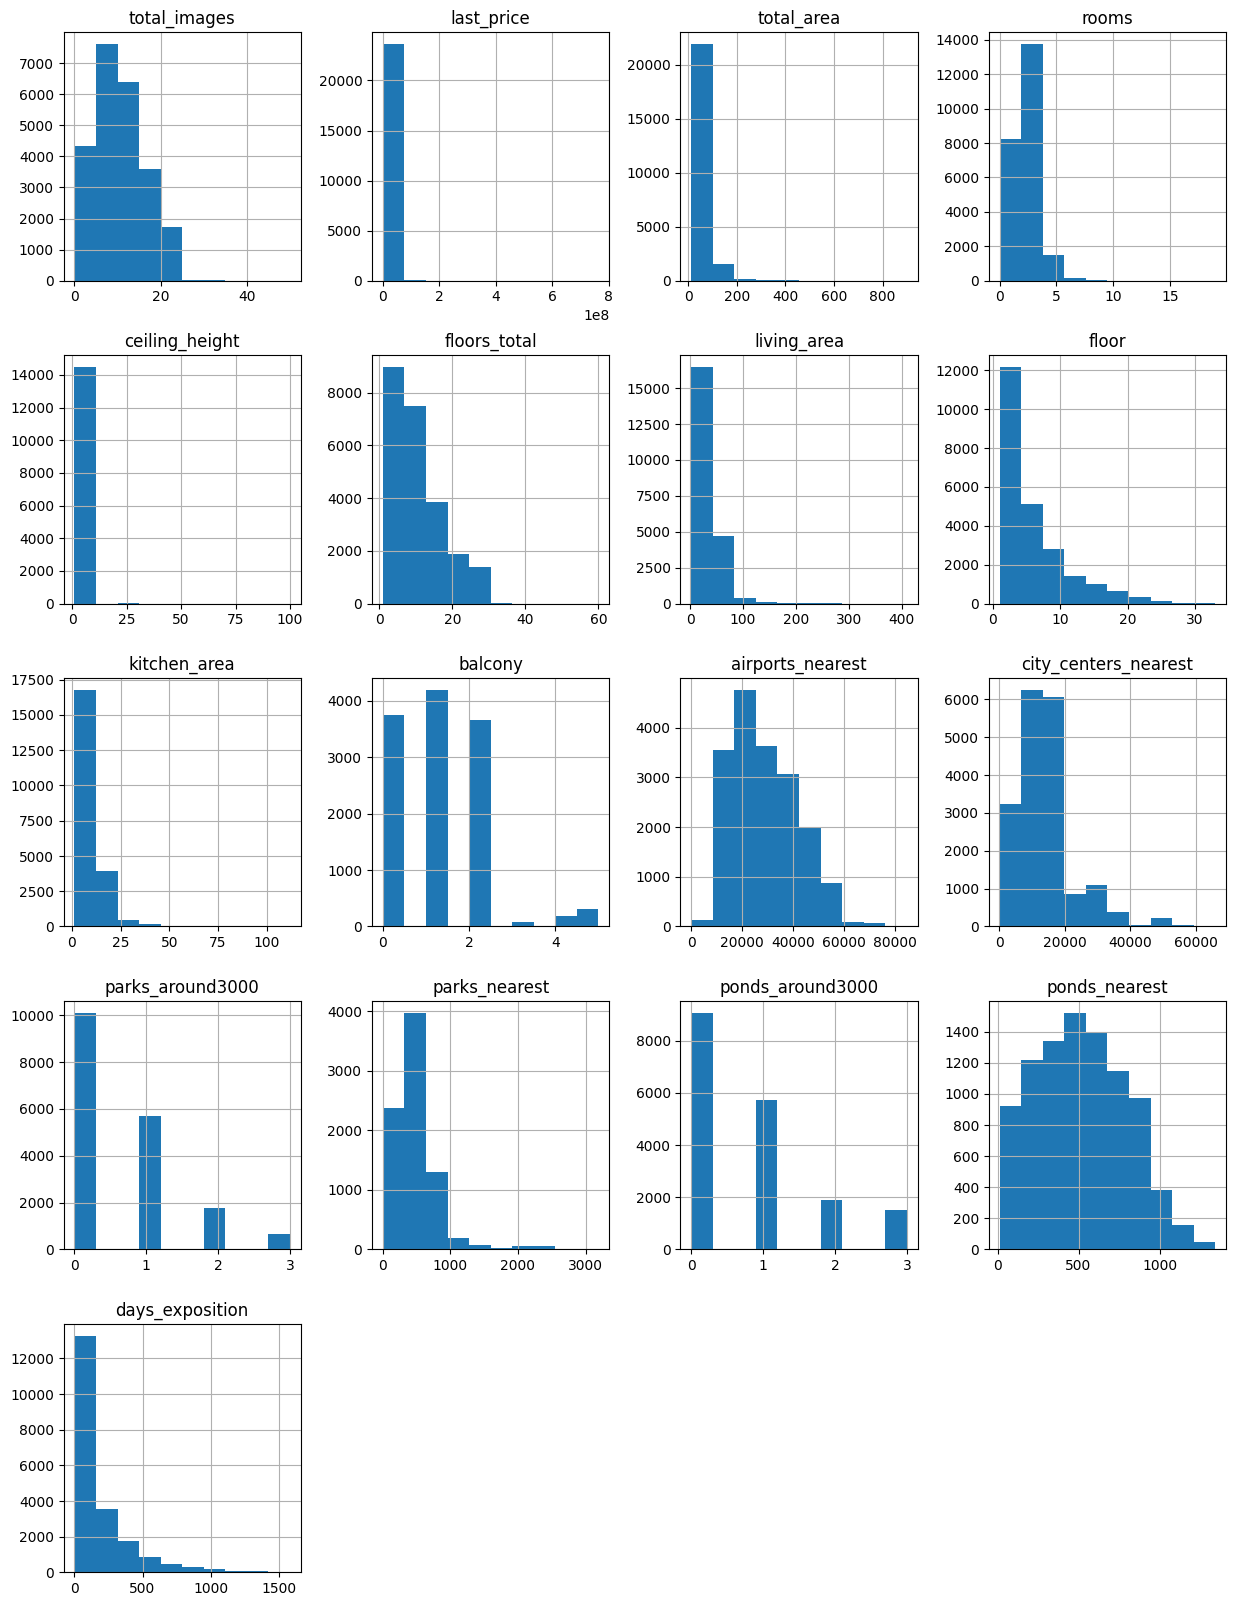

In [7]:
#Визуализируем общие данные
data_uncleaned.hist(figsize=(15, 20), bins= 10)

Общая предварительная оценка данных:
- набор данных достаточен для анализа
- есть пропуски, аномалии и выбросы
- присутсвуют неправильные типы данных


### Предобработка данных

#### Удаление дубликатов

In [8]:
data_uncleaned.duplicated().sum()

0

Явные дубликаты отсутсвуют. 

Выявим и удалим неявные дубликаты

In [9]:
data_uncleaned['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
len(data_uncleaned['locality_name'].unique())

365

In [11]:
data_uncleaned['locality_name'] = (
    data_uncleaned['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок','поселок городского типа', 
              'городской поселок', 'село', 
              'деревня', 'поселок станции', 
              'садоводческое некоммерческое товарищество',
              'садовое товарищество', 'пок' ], '', regex=True)
)

In [12]:
len(data_uncleaned['locality_name'].unique())

326

#### Исследование и заполнение пропусков



Есть много причин появления пропусков: технические или допущенные пользователями. 

Рассмотрим пропуски подробнее:

In [13]:
# Выведем долю пропущенных значений для каждого столбца датафрейма
(pd
 .DataFrame(data_uncleaned
            .isna()
            .mean()*100).style
            .background_gradient('coolwarm')
            )

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


- Поля ceiling_height, floors_total, living_area, kitchen_area, balcony, ocality_name заполнялись пользователями вручную. Продавец мог пропустить,  не придать значения важности той или иной характеристики квартиры или не имел точных измерений под рукой.

- Следующие столбцы заполнялись автоматически на основании адреса, указаного продавцом при размещении объявления: airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest 14589


<b> Предположение: </b> 

- Если адрес был указан не точно или не совпал с данными из библиотеки адресов, то поле осталось пустым.


- Пропуски в days_exposition скорее всего говорят о том, что квартира до сих пор не продана.

<b>ceiling_height</b>

- Заполнялось пользователем вручную. Продавец мог пропустить, не придать значения той или иной характеристики квартиры или не имел точных измерений под рукой.

- <b>Стратегия обработки:</b> 
- заменим медианным значением. Если квартрира с высокими потолками, скорее всего продавец указал бы это.



In [14]:
data = data_uncleaned
data['ceiling_height'] =(data_uncleaned['ceiling_height']
                         .fillna(data['ceiling_height']
                                 .median()))

<b>floors_total</b>
- Заполнялось пользователем вручную. Продавец не предоставил информацию.
- <b>Стратегия обработки:</b>  заполним медианным значенем. В тех случаях, когда медиана меньше этажа, на котором находится квартира, установим floors_total равным floor.

In [15]:
data['floors_total'] = (data['floors_total']
                        .fillna(data['floors_total']
                                .median()))
data.loc[data['floors_total'] < data['floor'], 
         'floors_total'] = data['floor']

<b>living_area</b>
- Предположение: продавец не предоставил инфомрацию.
- <b>Стретегия обработки:</b> заменим на медианное значение в зависимости от количества комнат

In [16]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 
             'living_area'] = data.loc[data['rooms'] == t , 
             'living_area'].median()


<b>locality_name, is_apartment</b>
- Предопложение: продавец не предоставил инфомрацию.
- Строки, где не указан <b>locality_name</b> Мы не можем вывести точный адрес объекта, поэтому лучшим решением будет удалить строки с пропусками в данных ячейках. 
- Cтолбец <b>is_apartment</b> имеет выдающееся число пропусков и только 50 положительных ответов. 
 

In [17]:
data.shape

(23699, 22)

In [18]:
data = data.dropna(subset=['locality_name'])
data = data.loc[:, data.columns != 'is_apartment']

In [19]:
data.shape

(23650, 21)

<b>kitchen_area</b>

- Предположение: пользователь не предоставил информацию.
- <b>Стратегия обработки:</b> пропуски в столбце для квартир - студий заменим на 0
- для всех остальных заменим на медианное значение в зависимости от количества комнат. 

In [20]:
data.loc[data['rooms'] == 0,'kitchen_area'] = 0
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 
             'kitchen_area'] = data.loc[data['rooms'] == t , 
                                        'kitchen_area'].median()


<b>balcony</b>
- Предположение: поле заполняется пользователями вручную. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.
- <b>Cтратегия обработки: </b>везде, где не указано число балконов поставим 0. 


In [21]:
data['balcony'] = data['balcony'].fillna(0)

<b> days_exposition </b>

- Предположение: отсутсвующие значения могут указывать, что квартира до сих пор не продана
- Стратегия обработки: заполним это поле очень большим значением, чтобы явным образом указать, что продажи еще не было.

In [22]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [23]:
data['days_exposition'] = data['days_exposition'].fillna(3000)

<b>city_centers_nearest, airports_nearest </b>
- Данные заполнялись автоматически согласно адресу, указанному продавцом. Предположение: если адрес был указан не точно или не совпал с данными из библиотеки адресов, то поле осталось пустым.
- <b>Стратегия обработки: </b>сгруппируем данные по городам и посчитаем медианное значение удаленности от центра города и аэропорта. 
Те строки, для которых не будет данных для сопоставления, заполним отрицательным значением (-1000), чтобы явно выделять эти строки.

In [24]:
data[['city_centers_nearest','airports_nearest']].isna().sum()

city_centers_nearest    5511
airports_nearest        5534
dtype: int64

In [25]:
for t in data['locality_name'].unique():
    data.loc[
        (data['locality_name'] == t) & (data['city_centers_nearest'].isna()), 
        'city_centers_nearest'
    ] = data.loc[
        (data['locality_name'] == t) & (~data['city_centers_nearest'].isna()), 
        'city_centers_nearest'
    ].median()

for t in data['locality_name'].unique():
    data.loc[
        (data['locality_name'] == t) & (data['airports_nearest'].isna()), 
        'airports_nearest'
    ] = data.loc[
        (data['locality_name'] == t) & (~data['airports_nearest'].isna()), 
        'airports_nearest'
    ].median()

In [26]:
data[['city_centers_nearest','airports_nearest']].isna().sum()

city_centers_nearest    4863
airports_nearest        4863
dtype: int64

In [27]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(-10000)
data['airports_nearest'] = data['airports_nearest'].fillna(-10000)

<b>parks_nearest, ponds_nearest</b>

- Данные заполнялись автоматически согласно адресу, указанному продавцом. Предположение: если адрес был указан не точно или не совпал с данными из библиотеки адресов, то поле осталось пустым. 

- <b>Стратегия обработки: </b> больше половины значений отсутсвует, данные нерепрезентативны. Удалим данные столбцы

In [28]:
data.shape

(23650, 21)

In [29]:
data = data.loc[:, data.columns != 'parks_nearest']
data = data.loc[:, data.columns != 'ponds_nearest']

In [30]:
data.shape

(23650, 19)

<b>parks_around3000, ponds_around3000</b>

- Данные заполнялись автоматически согласно адресу, указанному продавцом. Предположение: если адрес был указан не точно или не совпал с данными из библиотеки адресов, то поле осталось пустым. 

- <b>Стратегия обработки: </b> отсутсвующие значения заполним отрицательным значением (-1), чтобы явно выделять эти строки.

In [31]:
data[['parks_around3000','ponds_around3000']] = (data[
    [ 'parks_around3000', 'ponds_around3000']
    ].fillna(-1))

In [32]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
ponds_around3000        0
days_exposition         0
dtype: int64

In [33]:
print('Итоги заполнения пропусков:')

print('-'*40)
print ('Всего строк изначально:', len(data_uncleaned))
print ('Всего строк после заполнения:', len(data))
print ('Процент строк, который был удален:', (
    (len(data_uncleaned) - len(data))/len(data_uncleaned))*100, '%')

    

Итоги заполнения пропусков:
----------------------------------------
Всего строк изначально: 23699
Всего строк после заполнения: 23650
Процент строк, который был удален: 0.20675977889362418 %


####  Изменение типа данных


- first_day_exposition в <b>формат времени</b>, для удобства дальнейшей работы.
- floors_total в <b>int</b>, так как количество этажей в доме не может быть дробным
- balcony в <b>int</b> по тем же причинам

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                            format='%Y-%m-%dT%H:%M:%S')
data[['floors_total', 
      'balcony']] = data[
          ['floors_total', 
           'balcony']].astype('int', errors = 'raise')

In [35]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
ponds_around3000               float64
days_exposition                float64
dtype: object

### Исследовательский анализ данных

#### Добавление новых столбцов
Для дальнейшего исследования добавим следующие столбцы:
- price_per_square - цена одного квадратного метра, с точностью до 2х знаков
- day_exposition - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- month_exposition - месяц публикации объявления;
- year_exposition - год публикации объявления;
- type_of_floor - тип этажа квартиры (значения — «первый», «последний», «другой»);
- distance_from_center - расстояние до центра города в километрах

In [36]:
data['price_per_square'] = (data['last_price']/data['total_area']).round(2)
#data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year




data['type_of_floor'] = (data['floor']
                         .replace(1, 'первый')
                         .where(data['floor'] != data['floors_total'], 
                                'последний'))
                        
data.loc[(data['type_of_floor'] != 'первый') 
         & (data['type_of_floor'] != 'последний'), 
         'type_of_floor'] = 'другой'

data['distance_from_center'] = (data['city_centers_nearest']/1000).round(0)
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
ponds_around3000        0
days_exposition         0
price_per_square        0
day_exposition          0
month_exposition        0
year_exposition         0
type_of_floor           0
distance_from_center    0
dtype: int64

In [37]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_square,day_exposition,month_exposition,year_exposition,type_of_floor,distance_from_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,2.0,3000.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,2.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,3.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,1.0,121.0,100000.00,1,6,2018,другой,8.0


#### Обработака аномальных значений

<b>Оценим данные по каждому столбцу</b>



In [38]:
data.describe(include='all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_square,day_exposition,month_exposition,year_exposition,type_of_floor,distance_from_center
count,23650.000000,2.365000e+04,23650.000000,23650,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650,23650,23650.000000,23650.000000,23650,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650,23650.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другой,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23501,23583,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17366,NaN
mean,9.862326,6.541127e+06,60.329069,2017-11-10 00:03:57.463002112,2.070106,2.724311,10.680803,34.313121,5.893277,NaN,NaN,10.373329,0.591712,NaN,21382.304863,9424.023129,0.236110,0.357378,559.831628,9.943225e+04,2.568710,6.401564,2017.370021,NaN,9.421099
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,-10000.000000,-10000.000000,-1.000000,-1.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,NaN,-10.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,18.400000,2.000000,NaN,NaN,7.200000,0.000000,NaN,11875.000000,3828.000000,0.000000,0.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,NaN,4.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.300000,4.000000,NaN,NaN,9.010000,0.000000,NaN,23020.000000,11732.000000,0.000000,0.000000,124.000000,9.500000e+04,3.000000,6.000000,2017.000000,NaN,12.000000
75%,14.000000,6.799000e+06,69.700000,2018-08-27 00:00:00,3.000000,2.700000,16.000000,42.700000,8.000000,NaN,NaN,11.500000,1.000000,NaN,35742.000000,15717.000000,1.000000,1.000000,390.000000,1.142742e+05,4.000000,10.000000,2018.000000,NaN,16.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,NaN,NaN,112.000000,5.000000,NaN,84869.000000,65968.000000,3.000000,3.000000,3000.000000,1.907500e+06,6.000000,12.000000,2019.000000,NaN,66.000000


##### ceiling_height (высота потолков)

array([[<Axes: title={'center': 'ceiling_height'}>]], dtype=object)

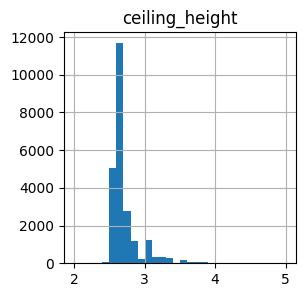

In [39]:
data.hist(column = 'ceiling_height', figsize=(3,3), bins=30, range=(2,5))

Максимальное значение доходит до 100м. Сложно представить себе такую квартиру. 
В тоже время значения в 25-35 метров скорее говорят о том, что продавец ошибся на порядок. Восстановим эти значения

In [40]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = (
    data
    .loc[data['ceiling_height'] > 20, 'ceiling_height']*0.1)

Избавимся от выбросов согласно гистограмме и "ящика с усами"

<Axes: ylabel='ceiling_height'>

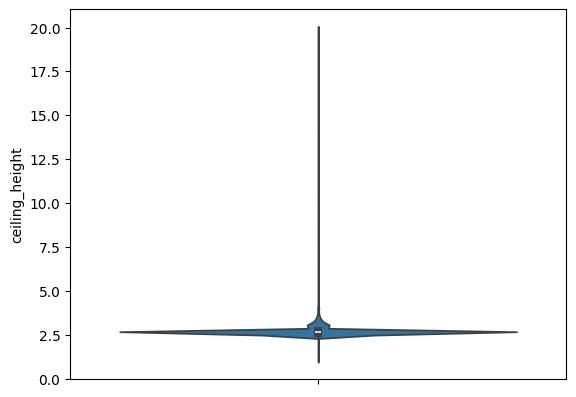

In [41]:
sb.violinplot(data=data['ceiling_height'])

In [42]:
data.shape

(23650, 25)

In [43]:
data = data.query('ceiling_height<5 and ceiling_height>2.4')

In [44]:
data.shape

(23589, 25)

<Axes: ylabel='ceiling_height'>

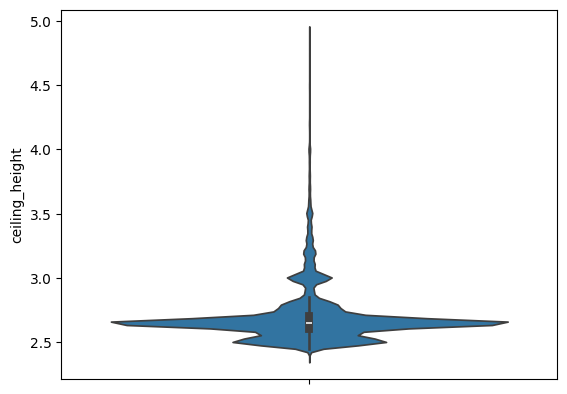

In [45]:
sb.violinplot(data=data['ceiling_height'])

##### last_price (цена объекта)

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

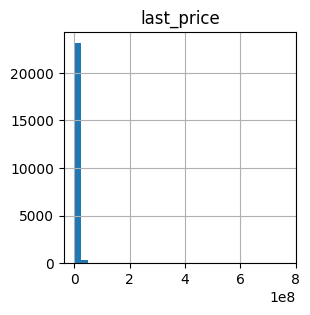

In [46]:
data.hist(column = 'last_price', figsize=(3,3), bins=30)

Гистограмма не похожа на нормальное распределение. 

Максимальное значение на несколько порядков выше значения 3 квартиля. А минимальное, напротив, на 2 порядка ниже 1 квартиля. 

Поэтому ограничим значения сверху и снизу, чтобы исключить аномально дешевые и дорогие квартиры.
Отсечем: все что дешевле 1 500 000 руб и дороже 50 000 000 руб.

In [47]:
data.shape

(23589, 25)

In [48]:
data = data.loc[(data['last_price'] < 50000000) & 
                (data['last_price'] > 1500000)]


In [49]:
data.shape

(22770, 25)

<Axes: ylabel='last_price'>

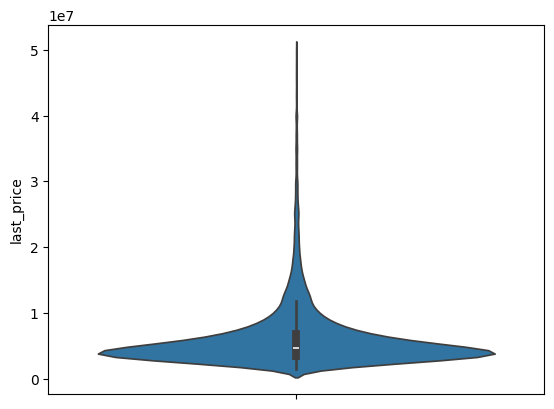

In [50]:
sb.violinplot(data=data['last_price'])

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

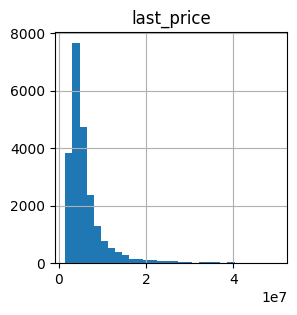

In [51]:
data.hist(column = 'last_price', figsize=(3,3), bins=30)

##### total_area (общая площадь)

Гистограмма столбца total_area (общая площадь) имеет очень длинный хост справа. 


Ограничим общую площадь сверху 
(отбросим строки, с площадью более 300 кв.)

In [52]:
data.shape

(22770, 25)

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

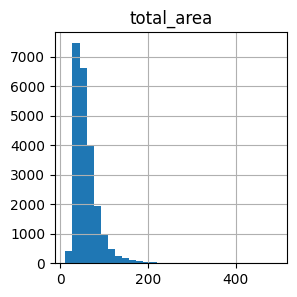

In [53]:
data.hist(column = 'total_area', figsize=(3,3), bins=30)

In [54]:
data = data.loc[data['total_area'] < 300]
data.shape

(22742, 25)

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

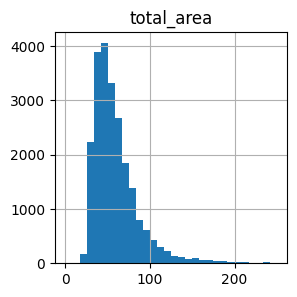

In [55]:
data.hist(column = 'total_area', figsize=(3,3), bins=30, range=(0, 250))

##### rooms (количество комнат)

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

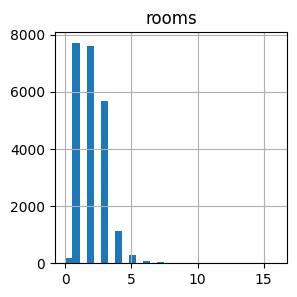

In [56]:
data.hist(column = 'rooms', figsize=(3,3), bins=30)

Аналогично исключим выбросы согласно гистограмме (исключим все значние ниже 8)


In [57]:
data.shape

(22742, 25)

In [58]:
data = data.query('rooms < 8')
data.shape

(22724, 25)

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

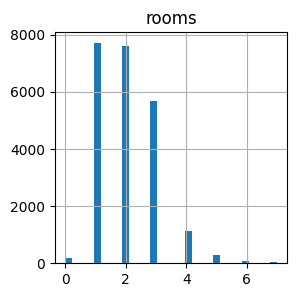

In [59]:
data.hist(column = 'rooms', figsize=(3,3), bins=30)

##### living_area (жилая площадь)

array([[<Axes: title={'center': 'living_area'}>]], dtype=object)

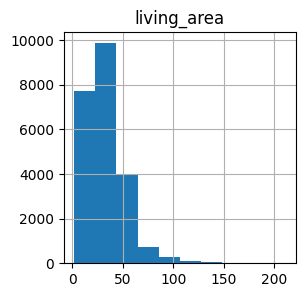

In [60]:
data.hist(column = 'living_area', figsize=(3,3), bins=10)

Гистограмма похожа на распределение Пуассона, оставим данные без изменений

##### kitchen_area (площадь кухни)

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

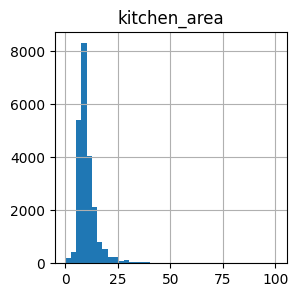

In [61]:
data.hist(column = 'kitchen_area', figsize=(3,3), bins=40)

максимальное значение kitchen_area (площадь кухни) в 6 раз привышает значение третьего квартиля. Исключим аномальные значения свыше 60 кв. м 

In [62]:
data.shape

(22724, 25)

In [63]:
data = data.query('kitchen_area < 60 and kitchen_area > 2')
data.shape


(22519, 25)

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

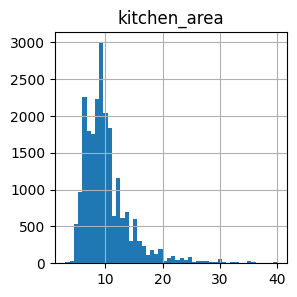

In [64]:
data.hist(column = 'kitchen_area', figsize=(3,3), bins=50,  range=(3,40))

##### floors_total и type_of_floor (тип этажа квартиры)

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

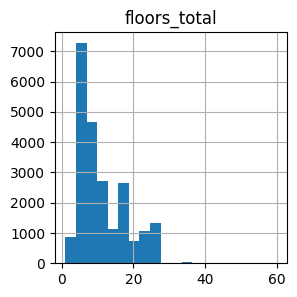

In [65]:
data.hist(column = 'floors_total', figsize=(3,3), bins=20)

Самый высокий жилой комплекс в Санкт-Петергубрге имеет высоту 126 м и имеет 37 этажей. 

Поэтому странно, что гистограмма total_floors имеет хвост на отметке 60 этажей. 

Таких записей 2, 
1.  60 исправим на 6
2. 52 на 25

In [66]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,ponds_around3000,days_exposition,price_per_square,day_exposition,month_exposition,year_exposition,type_of_floor,distance_from_center
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,7.4,0,Кронштадт,67763.0,49488.0,2.0,3.0,166.0,83516.48,3,6,2018,другой,49.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,14.0,0,Санкт-Петербург,20728.0,12978.0,1.0,0.0,45.0,99450.00,0,9,2018,другой,13.0


array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

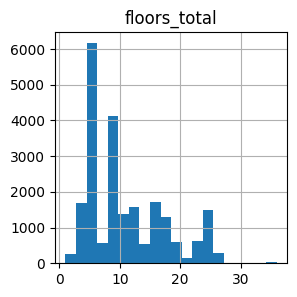

In [67]:
data.loc[2253, 'floors_total'] = 6
data.loc[16731, 'floors_total'] =25
data.hist(column = 'floors_total', figsize=(3,3), bins=20)

In [68]:
type_of_floor = pd.pivot_table(data,
                               index='type_of_floor',
                               values='floor',
                               aggfunc = 'count')
type_of_floor

,floor
type_of_floor,
другой,16766
первый,2653
последний,3100


<Axes: ylabel='type_of_floor'>

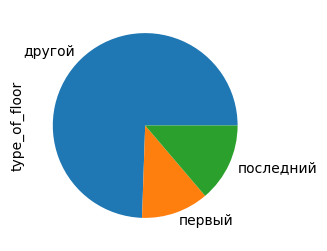

In [69]:
type_of_floor = data.groupby('type_of_floor')['type_of_floor'].count()
type_of_floor.plot(kind = 'pie', figsize= (3,3))

Подавляющее большинство квартир находится на средних этажак, что согласуется с многоэтажной застройкой. 

#####  cityCenters_nearest (расстояние до центра города)

array([[<Axes: title={'center': 'city_centers_nearest'}>]], dtype=object)

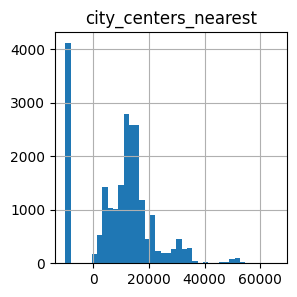

In [70]:
data.hist(column = 'city_centers_nearest', figsize=(3,3), bins=40)

Кроме города Санкт-Петербург в выборке представлены города и поселки Ленинградской области, находящиеся на разном удалении от города.

In [71]:
print('Итоги подготовки данных:')

print('-'*40)
print ('Всего строк изначально:', len(data_uncleaned))
print ('Всего строк после подготовки:', len(data))
print ('Процент строк, который был удален:', 
       ((len(data_uncleaned) - len(data))/len(data_uncleaned))*100, '%')

Итоги подготовки данных:
----------------------------------------
Всего строк изначально: 23699
Всего строк после подготовки: 22519
Процент строк, который был удален: 4.9791130427444195 %


<div style="border:solid lightblue 2px; padding: 20px; "> Данные прошли обработку и соответсвуют необходимому уровню качества для дальнейшего анализа и проверке гипотез.
    </div

### Работа с данными

#### Определим как быстро продавались квартиры

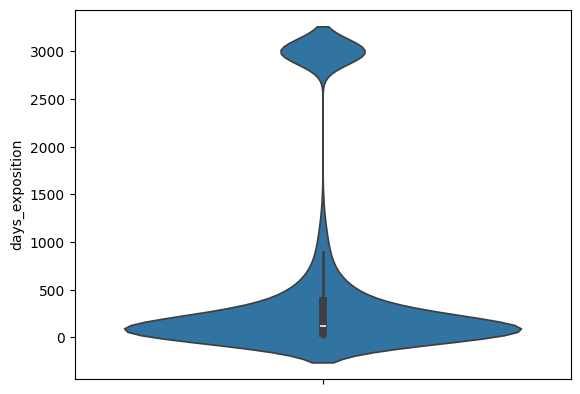

In [72]:
sb.violinplot(data = data["days_exposition"],legend = 'auto')
sb.ylabel = 'количество дней до продажи'


Исключим строки, где срок продажи квартиры неизвестен.

In [73]:
days_exposition = data.query('days_exposition<3000')
days_exposition['days_exposition'].describe()

count    19542.000000
mean       180.732269
std        220.029539
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

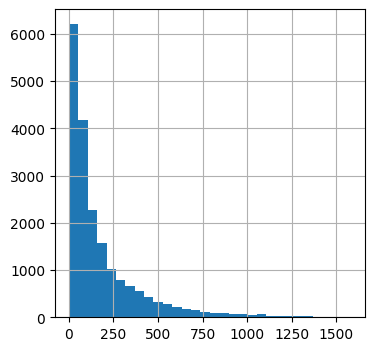

In [74]:
days_exposition['days_exposition'].hist(bins=30, figsize=(4,4))

In [75]:
print('Выводы')
print('-'*60)
print('Обычно продажа занимает порядка', 
      days_exposition['days_exposition'].median()
      )
print('Быстрой можно считать продажу, которая состоялась за', 
      days_exposition['days_exposition'].quantile(0.25).round(2), 
      'дня и менее.'
      )
print('Необычно долгими можно считать продажи за', 
      days_exposition['days_exposition'].quantile(0.75).round(2),
      'и более дней.'
      )

Выводы
------------------------------------------------------------
Обычно продажа занимает порядка 95.0
Быстрой можно считать продажу, которая состоялась за 45.0 дня и менее.
Необычно долгими можно считать продажи за 231.0 и более дней.


#### Определим факторы, которые больше всего влияют на общую( полную) стоимость объекта.

##### Зависимость полной стоимости объекта от общей площади

<Axes: title={'center': 'Зависимость стоимости объекта от общей площади'}, xlabel='total_area'>

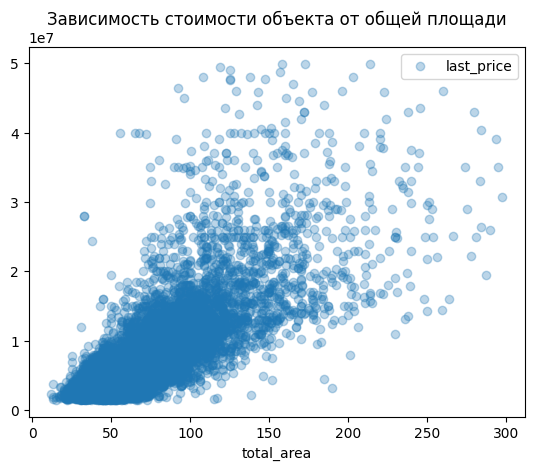

In [76]:
data.plot(title='Зависимость стоимости объекта от общей площади', 
          y = 'last_price', x= 'total_area', 
          style = 'o', alpha = 0.3)

In [77]:
data[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.780519
total_area,0.780519,1.000000


<b>Вывод</b>

Данные показывают сильную положительную корреляцию между общей стоимостью объекта и общей площадью.
- Чем больше площадь объекта, тем выше его полная стоимость.
- Однако, зависимость не прямо пропорциональная, коэффициент корееляции 0.78.

##### Зависимость цены квартиры от жилой площади

<Axes: title={'center': 'Зависимость общей стоимости объекта от жилой площади'}, xlabel='living_area'>

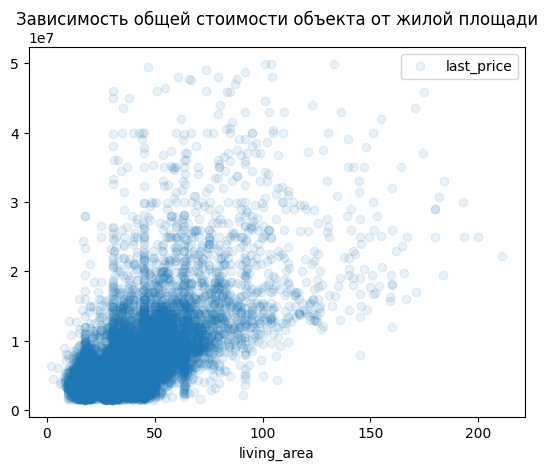

In [78]:
data.plot(title='Зависимость общей стоимости объекта от жилой площади', 
         x = 'living_area', y = 'last_price',
         style = 'o', alpha = 0.1)

In [79]:
data[['living_area', 'last_price']].corr()

,living_area,last_price
living_area,1.000000,0.654789
last_price,0.654789,1.000000


<b>Вывод</b>

Данные показывают положительную корреляцию между общей стоимостью объекта и жилой площадью.
- Коэффициент корреляции 0.65, что ниже коэффициента с общей площадью. 
- Можно сделать вывод, что влияние жилой площади на общую стоимость ниже. 


##### Зависимость общей стоимости объекта  от площади кухни

<Axes: title={'center': 'Зависимость общей стоимости объекта от площади кухни'}, xlabel='kitchen_area'>

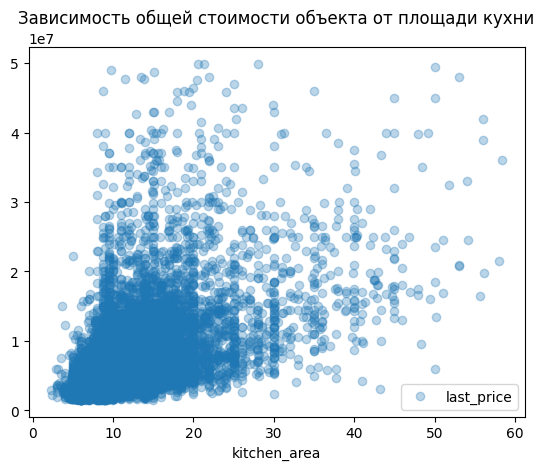

In [80]:
data.plot(title='Зависимость общей стоимости объекта от площади кухни', 
         x = 'kitchen_area',  y = 'last_price',
         style = 'o', alpha = 0.3)

In [81]:
data[['kitchen_area', 'last_price']].corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.572208
last_price,0.572208,1.000000


<b>Вывод</b>

Установлена прямая зависимость между площадью кухни и ценой за квадратный метр:
- чем больше площадь кухни, тем выше цена за квадратный метр. 
- Коэффициент корреляции 0.57, т.е. площадь кухни влияет на общую стоимость квартиры меньше, чем общая площадь и жилая площадь.

##### Зависимость общей стоимости объекта от количества комнат

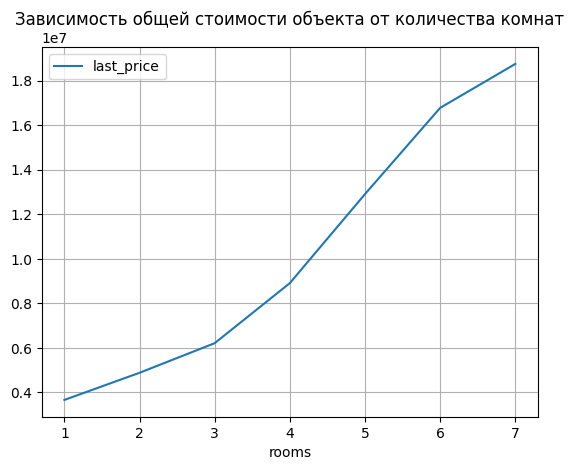

In [82]:
(data
 .pivot_table(
    index='rooms',
    values='last_price',
    aggfunc = 'median')
    .plot(
    title = 'Зависимость общей стоимости объекта от количества комнат',
    grid = True
    )
    )
plt.show()

<Axes: title={'center': 'Зависимость общей стоимости квартиры от количества комнат'}, xlabel='rooms'>

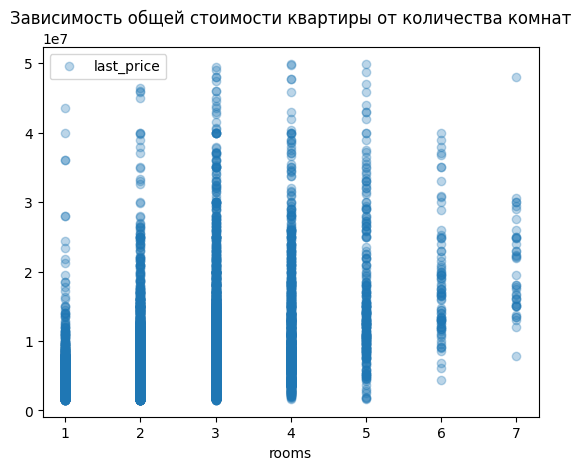

In [83]:
data.plot(title='Зависимость общей стоимости квартиры от количества комнат', 
         x = 'rooms', y = 'last_price', 
         style = 'o', alpha = 0.3)

In [84]:
data[['rooms', 'last_price']].corr()

,rooms,last_price
rooms,1.000000,0.492813
last_price,0.492813,1.000000


<b>Вывод</b>

- Данные показывают прямую зависимость между полной стоимостью квартиры и количеством комнат.
- Коэффициент корреляции 0,49.

##### Зависимость полной стоимости объекта от этажа

<Axes: title={'center': 'Зависимость полной стоимости объекта от этажа, медианное значение'}, xlabel='type_of_floor'>

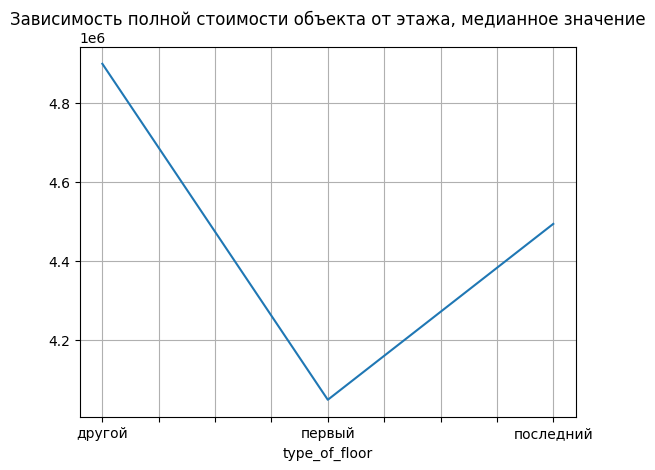

In [85]:
(data
 .groupby(by='type_of_floor')['last_price']
 .median()
 .plot(
     title='Зависимость полной стоимости объекта от этажа, медианное значение',
     grid = True)
)

<Axes: title={'center': 'Зависимость полной стоимости объекта от этажа, среднее значение'}, xlabel='type_of_floor'>

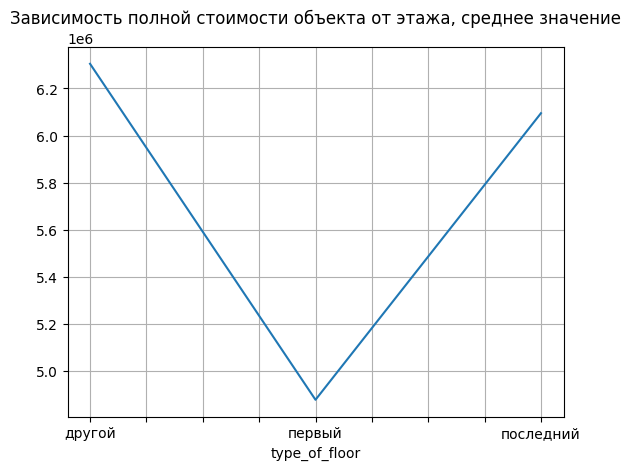

In [86]:
(data.groupby(by='type_of_floor')['last_price']
.mean()
.plot(title='Зависимость полной стоимости объекта от этажа, среднее значение',
     grid = True))

<b>Вывод</b>

Данные показывают:
- Средние этажи имеют самую высокую стоимость.
- Квартиры на 1 этаже имеют самую низкую стоимость.
- Разница между медианной и средней зависимостью для последнего этажа говорит о том, что для этого типа квартир есть существенный размах в значениях цены. Есть объявления, которые по цене не уступают квартирам на других этажах.

##### Зависимость полной стоимости объекта от даты размещения

<Axes: title={'center': 'Зависимость полной стоимости объекта от года размещения'}, xlabel='year_exposition'>

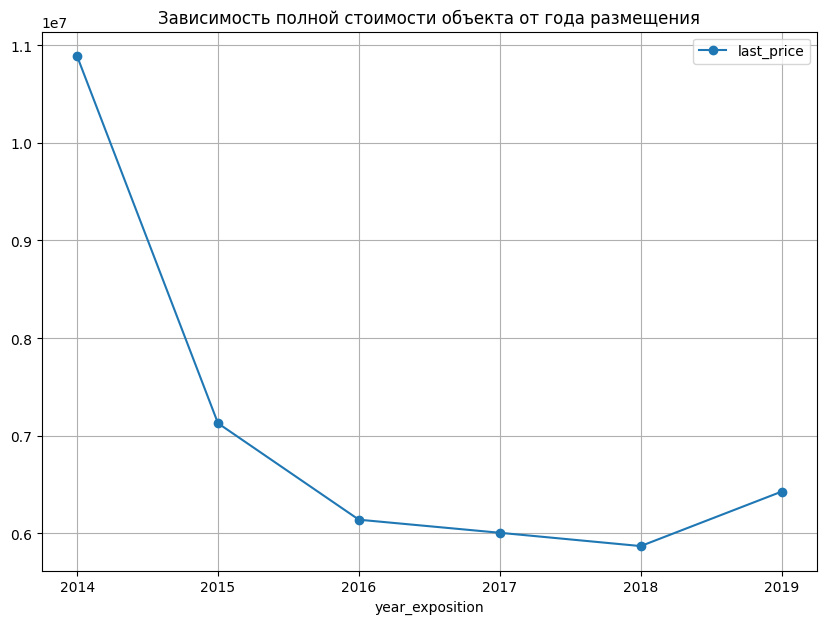

In [87]:
cost_per_year_exposition = data.pivot_table(index = 'year_exposition',
                                            values = 'last_price').reset_index()

(cost_per_year_exposition
 .plot(title='Зависимость полной стоимости объекта от года размещения', 
       figsize=(10,7), 
       x='year_exposition',
       y='last_price',
       grid = True, 
       style = 'o-')
       )

In [88]:
cost_per_year_exposition['dynamics'] = (
    cost_per_year_exposition['last_price']/
    cost_per_year_exposition.loc[0,'last_price']*100)
cost_per_year_exposition

,year_exposition,last_price,dynamics
0,2014,1.088825e+07,100.000000
1,2015,7.127208e+06,65.457808
2,2016,6.138957e+06,56.381499
3,2017,6.005039e+06,55.151569
4,2018,5.868718e+06,53.899560
5,2019,6.426696e+06,59.024150


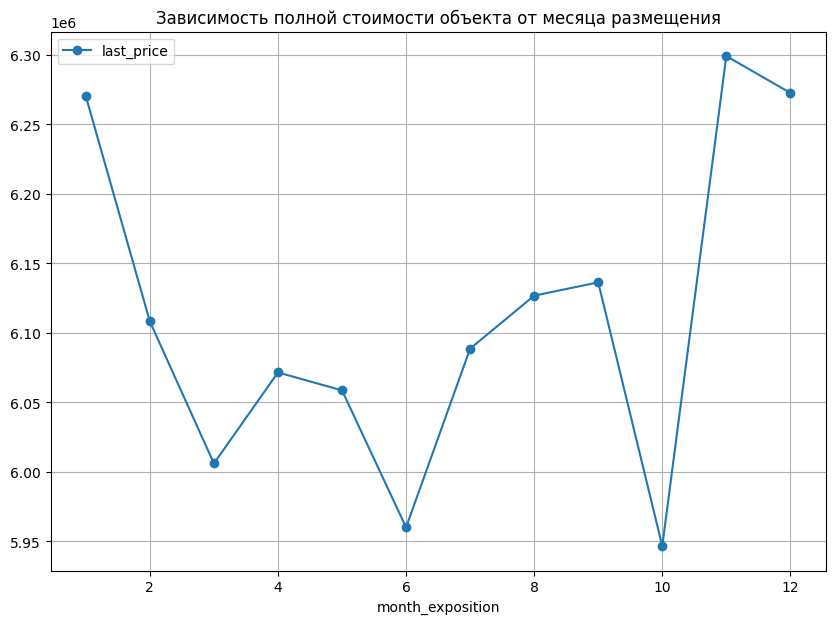

In [89]:
(data.pivot_table(index = 'month_exposition', 
                 values = 'last_price')
 .plot(title='Зависимость полной стоимости объекта от месяца размещения', 
       figsize=(10,7), 
       grid = True, 
       style = 'o-')
       )
plt.show()

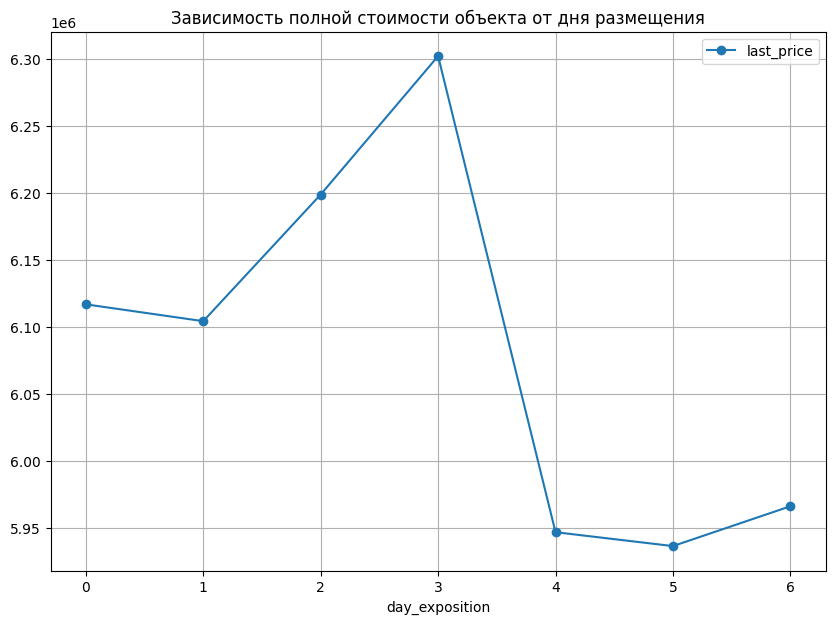

In [90]:
(data.pivot_table(index = 'day_exposition', 
                 values = 'last_price')
 .plot(title='Зависимость полной стоимости объекта от дня размещения', 
       figsize=(10,7), 
       grid = True, 
       style = 'o-'))
plt.show()

In [91]:
print("Вывод:")
print("*"*80)

print('Данные показывают:')
print('- С 2014 по 2018 год наблюдалось падение стоимости квартир на', 
      (100 - cost_per_year_exposition.loc[2,'dynamics']).round(2), '%') 
print('- Но к 2019 году цена выросла и составила', 
      cost_per_year_exposition.loc[5,'dynamics'].round(2), 
      '% от цены 2014 года')
print('- Пики падения общей стоимости приходятся на март, июнь,  октябрь')
print('- Самая низкая общая стоимость  наблюдалась в октябре.')
print('- Пики роста общей стоимости  - январь, ноябрь, декабрь.')
print('- С понедельника по пятницу стоимость  растет.',
      ' Максимальная общая стоимость приходится на четверг')
print('- В пятницу и выходные дни наблюдается самая низкая цена.')

Вывод:
********************************************************************************
Данные показывают:
- С 2014 по 2018 год наблюдалось падение стоимости квартир на 43.62 %
- Но к 2019 году цена выросла и составила 59.02 % от цены 2014 года
- Пики падения общей стоимости приходятся на март, июнь,  октябрь
- Самая низкая общая стоимость  наблюдалась в октябре.
- Пики роста общей стоимости  - январь, ноябрь, декабрь.
- С понедельника по пятницу стоимость  растет.  Максимальная общая стоимость приходится на четверг
- В пятницу и выходные дни наблюдается самая низкая цена.


#### ТОП-10 населенных пунктов с наибольшим числом объявлений

In [92]:
top_locality_name=(data.pivot_table(index='locality_name', 
                  values = ['price_per_square' , 'last_price'],
                  aggfunc = {'price_per_square': "mean", 'last_price':"count"})
                   .sort_values(by ='last_price', ascending = False)
                   .reset_index()
                   .iloc[:10, :]
                   .sort_values(by ='price_per_square', ascending = False)
                   .reset_index(drop=True)
                   )
top_locality_name.columns=['locality_name', 'count', 'price_per_square' ]
top_locality_name.style.background_gradient(cmap='bwr')

,locality_name,count,price_per_square
0,Санкт-Петербург,15390,112073.528397
1,Пушкин,361,102950.361745
2,Кудрово,283,92297.218834
3,Парголово,323,90289.778019
4,Мурино,529,85004.057807
5,Шушары,436,78405.738532
6,Колпино,336,75352.475595
7,Гатчина,301,69536.314385
8,Всеволожск,386,69007.249715
9,Выборг,223,59529.860673


In [93]:
print('Выводы:')
print('*'*100)

print('- Больше всего объявлений в', 
      top_locality_name.sort_values(by='count').loc[0,'locality_name'] ,
      ' :', top_locality_name.loc[0, 'count'])
print('Это составляет:', 
      ((top_locality_name.loc[0, 'count'].round(2)/len(data))*100).round(2) ,
      '% от всех объявлений')

print('- Cамая высокая цена за квадратный метр ', 
      (top_locality_name
       .sort_values(by='price_per_square')
       .loc[0,'locality_name']) ,
      ' :', top_locality_name.loc[0, 'price_per_square'].round(2), 'руб.')
print('- Замыкает 10-ку по количеству объявлений', 
      top_locality_name.loc[9, 'locality_name'],
      'с числом объявлений:', 
      top_locality_name.loc[9, 'count'].round(2))
print('- Cамая низкая цена за квадратный метр ', 
      (top_locality_name
       .sort_values(by='price_per_square')
       .loc[9,'locality_name']) ,
      ' :', top_locality_name.loc[9, 'price_per_square'].round(2), 'руб.')

Выводы:
****************************************************************************************************
- Больше всего объявлений в Санкт-Петербург  : 15390
Это составляет: 68.34 % от всех объявлений
- Cамая высокая цена за квадратный метр  Санкт-Петербург  : 112073.53 руб.
- Замыкает 10-ку по количеству объявлений Выборг с числом объявлений: 223
- Cамая низкая цена за квадратный метр  Выборг  : 59529.86 руб.


#### Средняя стоимость квартир в Санкт-Петербурге на разном удалении от центра.

In [94]:
data_st_peterburg = (data.query('locality_name == "Санкт-Петербург"')
                     .pivot_table(index='distance_from_center', 
                                  values = 'price_per_square', 
                                  aggfunc = 'mean')
                     .reset_index()
                    )
data_st_peterburg

,distance_from_center,price_per_square
0,0.0,192050.501364
1,1.0,146416.460690
2,2.0,137234.573979
3,3.0,118663.284577
4,4.0,127577.810641
5,5.0,134882.914431
6,6.0,140192.418017
7,7.0,141320.461611
8,8.0,123925.408718
9,9.0,113277.679440


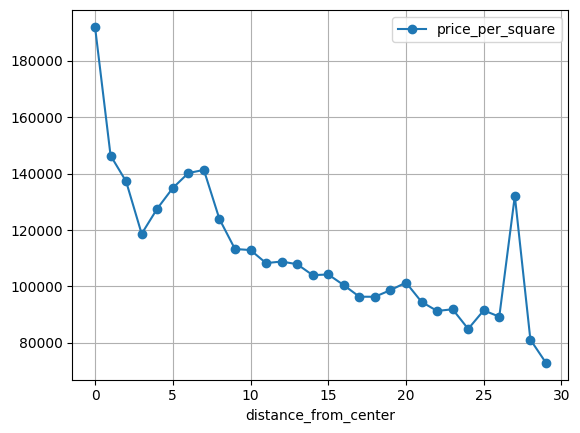

In [95]:
data_st_peterburg.plot(x ='distance_from_center', 
                       y = 'price_per_square', 
                       style='o-', 
                       grid = True)
plt.show()


In [96]:
st_peterburg_corr = data_st_peterburg.corr()
st_peterburg_corr

,distance_from_center,price_per_square
distance_from_center,1.000000,-0.803502
price_per_square,-0.803502,1.000000


In [97]:
print('Выводы:')
print("-"*60)
print('Данные показывают обратную зависимость между расстоянием ',
      'от центра и ценой за квадртаный метр:')
print('- Коэффициент корреляции составляет:', 
      st_peterburg_corr.loc['distance_from_center', 
                            'price_per_square'].round(2) )
print('- Чем дальше от центра города, тем дешевле квартиры')
print('- В радиусе 5-7 км от центра падение прекращается и наблюдается рост',
      ' цены, что скорее всего связано с особым благоустройвтвом района ')
print('- Неожиданный всплеск цены наблюдается в радиусе 27км от центра, ',
      'что также может говорить о благоусройстве района.')
print('- Максимальная цена за кв. метр составляет:', 
      data_st_peterburg['price_per_square'].max().round(2))
print('- Минимальная:', data_st_peterburg['price_per_square'].min().round(2), 
      'руб. за кв. метр')

Выводы:
------------------------------------------------------------
Данные показывают обратную зависимость между расстоянием  от центра и ценой за квадртаный метр:
- Коэффициент корреляции составляет: -0.8
- Чем дальше от центра города, тем дешевле квартиры
- В радиусе 5-7 км от центра падение прекращается и наблюдается рост  цены, что скорее всего связано с особым благоустройвтвом района 
- Неожиданный всплеск цены наблюдается в радиусе 27км от центра,  что также может говорить о благоусройстве района.
- Максимальная цена за кв. метр составляет: 192050.5
- Минимальная: 72953.37 руб. за кв. метр


### Выводы

В ходе исследования были сделаны следующие наблюдения и установлены зависимости:

- Начиная с 2014 года по 2018 квартиры дешевели, но с 2018 года наблюдается рост.
- Время продажи квартиры варьируется от 45 до 231 дня. В среднем занимает 95 дней.
- Больше всего на общую стоимость квартиры влияет ее общая площадь. Чем больше площадь, тем дороже квартира.
- Площадь кухни и жилая площадь также влияют на общую стоимость, но в меньшей степени.
- Квартиры на первых этажах имеют самую низкую стоимость.
- Самая низкая цена на квартиры наблюдается в октябре, самая высокая в ноябре.
- С понедельника по пятницу стоимость квартир растет. Максимальная общая стоимость приходится на четверг. В пятницу и выходные дни наблюдается самая низкая цена.

- Больше всего объявлений о продаже в г. Санкт-Петербург, тамже самая высокая стоимость за квадатный метр.
- Квартиры в центре города имеют самыю высокую цену за квадртаный метр, но выделяются районы в 5-7км и в 27км от центра с высокой ценой.

